In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def euler_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Euler's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Euler's numerical approximation of the next function value f(x1)
    """
    x = x0 + k * f(x0, y0, t0)
    return x

def heun_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Heun's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Heun's numerical approximation of the next function value f(x1)
    """
    x1_temp = euler_method(x0, y0, k, t0, f)
    y1_temp = euler_method(x0, y0, k, t0, f)
    x = x0 + k / 2 * (f(x0, y0, t0) + f(x1_temp, y1_temp, t0 + k))
    return x

In [42]:
# verifying heuns method with an example: y' = x + y
x0 = 0
y0 = 0
xn = 60
k = 0.1

df = pd.DataFrame(columns=['x', 'y'])
df['x'] = [x0]
df['y'] = [y0]


df

,x,y
0,0,0


In [37]:
df.iloc[0, 1]
# df['x'][0]

1

In [44]:
def position(x0, v0, a, t):
    return x0 + v0 * t + 1/2 * a * t**2

def velocity(v0, a, t):
    return v0 + a * t

Earth
(0, 0) (0, 1) (1, 0)


C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipyker

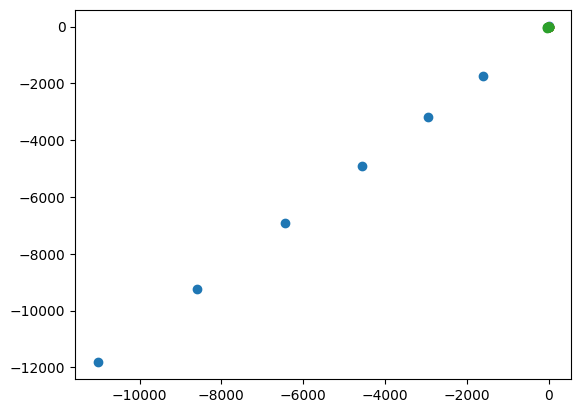

In [126]:
class Planet:
    def __init__(self, name, x, y, vx, vy, ax, ay):
        self.name = name
        self.x = x
        self.y = y  
        self.vx = vx
        self.vy = vy
        self.ax = ax
        self.ay = ay

    def getName(self):
        return f"{self.name}"

    def getPos(self):
        return (self.x, self.y)
    
    def getVel(self):
        return (self.vx, self.vy)
    
    def getAcc(self):
        return (self.ax, self.ay)
    
    def setPos(self, x, y, vx, vy, ax, ay, t):
        self.x = x + vx * t + 1/2 * ax * t**2
        self.y = y + vy * t + 1/2 * ay * t**2
    
    def setVel(self, vx, vy, ax, ay, t):
        self.vx = vx + ax * t
        self.vy = vy + ay * t

    def setAcc(self, x1, y1, x2, y2, x3, y3):
        self.ax = - (x1 - x2) / ((x1 + x2)**2 + (y1 + y2)**2)**(3/2) - (x1 - x3) / ((x1 + x3)**2 + (y1 + y3)**2)**(3/2)
        self.ay = - (y1 - y2) / ((x1 + x2)**2 + (y1 + y2)**2)**(3/2) - (y1 - y3) / ((x1 + x3)**2 + (y1 + y3)**2)**(3/2)
    
    def update(self, x1, y1, x2, y2, x3, y3, t):
        self.setAcc(x1, y1, x2, y2, x3, y3)
        self.setVel(self.vx, self.vy, self.ax, self.ay, t)
        self.setPos(self.x, self.y, self.vx, self.vy, self.ax, self.ay, t)


P1 = Planet('Earth', 0, 0, 0, 0, 0, 0)
P2 = Planet('Mars', 0, 1, 0, 0, 0, 0)
P3 = Planet('Venus', 1, 0, 0, 0, 0, 0)
print(P1.getName())
print(P1.getPos(), P2.getPos(), P3.getPos())
df = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])
for i in range(10):
    P1.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)
    
    P2.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)
    
    P3.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)

    data = [P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1]]
    df2 = pd.DataFrame([data], columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])
    df = df.append(df2, ignore_index=True)

plt.scatter(df['x1'], df['y1'], label='Earth')
plt.scatter(df['x2'], df['y2'], label='Mars')
plt.scatter(df['x3'], df['y3'], label='Venus')

C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\343979763.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\343979763.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\343979763.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\343979763.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ip

,time,x1,y1,vx1,vy1,ax1,ay1,x2,y2,vx2,vy2,ax2,ay2,x3,y3,vx3,vy3,ax3,ay3
0,0,1.875000,-1.000000,1.250000,-1.000000,1.250000,-0.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.125000,1.000000,-1.250000,1.000000,-1.250000,-0.000000
1,1,2.425703,-1.200804,0.783802,-0.467202,-0.466198,0.532798,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.425703,1.200804,-0.783802,0.467202,0.466198,-0.532798
2,2,2.796761,-1.320371,0.508639,-0.235446,-0.275163,0.231757,1.0,1.249001e-16,-5.551115e-17,8.326673e-17,-5.551115e-17,8.326673e-17,-0.796761,1.320371,-0.508639,0.235446,0.275163,-0.231757
3,3,3.001500,-1.332492,0.306039,-0.086563,-0.202600,0.148883,1.0,1.873501e-16,-1.110223e-16,6.938894e-17,-5.551115e-17,-1.387779e-17,-1.001500,1.332492,-0.306039,0.086563,0.202600,-0.148883
4,4,3.037584,-1.239333,0.126069,0.033252,-0.179970,0.119815,1.0,3.400058e-16,-1.942890e-16,1.249001e-16,-8.326673e-17,5.551115e-17,-1.037584,1.239333,-0.126069,-0.033252,0.179970,-0.119815
5,5,2.882002,-1.034770,-0.061699,0.147459,-0.187768,0.114207,1.0,5.898060e-16,-3.608225e-16,2.081668e-16,-1.665335e-16,8.326673e-17,-0.882002,1.034770,0.061699,-0.147459,0.187768,-0.114207
6,6,2.464105,-0.691465,-0.299164,0.278023,-0.237465,0.130564,1.0,1.151856e-15,-8.604228e-16,4.440892e-16,-4.996004e-16,2.359224e-16,-0.464105,0.691465,0.299164,-0.278023,0.237465,-0.130564
7,7,1.518258,-0.108027,-0.730287,0.481633,-0.431123,0.203610,1.0,3.344547e-15,-3.580469e-15,1.609823e-15,-2.720046e-15,1.165734e-15,0.481742,0.108027,0.730287,-0.481633,0.431123,-0.203610
8,8,-5.761462,1.738786,-5.096575,1.391753,-4.366288,0.910120,1.0,4.025946e-14,-2.953471e-13,2.514655e-14,-2.917666e-13,2.353673e-14,7.761462,-1.738786,5.096575,-1.391753,4.366288,-0.910120
9,9,-10.820780,3.120959,-5.071737,1.385366,0.024838,-0.006387,1.0,6.925450e-14,-3.027543e-13,2.771221e-14,-7.407269e-15,2.565656e-15,12.820780,-3.120959,5.071737,-1.385366,-0.024838,0.006387


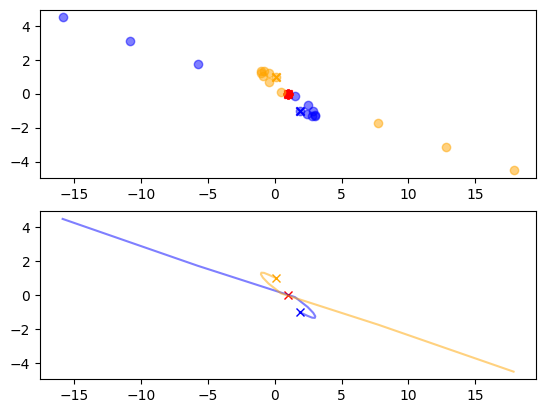

In [158]:
# Starting from scratch
def acceleration(x1, y1, x2, y2, x3, y3):
    """Returns tuple of acceleration of an object with position (x1, y1) due to the gravitational force of two other objects with positions (x2, y2) and (x3, y3).

    Args:
        x1 (_type_): current object's x position
        y1 (_type_): 
        x2 (_type_): _description_
        y2 (_type_): _description_
        x3 (_type_): _description_
        y3 (_type_): _description_

    Returns:
        _type_: _description_
    """
    return - ((x1 - x2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((x1 - x3)/((x1-x3)**2+(y1-y3)**2)**(3/2)), - ((y1 - y2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((y1 - y3)/((x1-x3)**2+(y1-y3)**2)**(3/2))

def velocity(v0x, v0y, ax, ay, t):
    return (v0x + ax * t, v0y + ay * t)

def position(x0, y0, v0x, v0y, ax, ay, t):
    return (x0 + v0x * t + 1/2 * ax * t**2, y0 + v0y * t + 1/2 * ay * t**2)

df = pd.DataFrame(columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])


# Initial conditions
x1 = 0
y1 = 0
vx1 = 0
vy1 = -1
x2 = 1
y2 = 0
vx2 = 0
vy2 = 0
x3 = 2
y3 = 0
vx3 = 0
vy3 = 1

for i in range(0,11):
    t = i
    ax1, ay1 = acceleration(x1, y1, x2, y2, x3, y3)
    ax2, ay2 = acceleration(x2, y2, x1, y1, x3, y3)
    ax3, ay3 = acceleration(x3, y3, x1, y1, x2, y2)
    vx1, vy1 = velocity(vx1, vy1, ax1, ay1, 1)
    vx2, vy2 = velocity(vx2, vy2, ax2, ay2, 1)
    vx3, vy3 = velocity(vx3, vy3, ax3, ay3, 1)
    x1, y1 = position(x1, y1, vx1, vy1, ax1, ay1, 1)
    x2, y2 = position(x2, y2, vx2, vy2, ax2, ay2, 1)
    x3, y3 = position(x3, y3, vx3, vy3, ax3, ay3, 1)
    data = [t, x1, y1, vx1, vy1, ax1, ay1, x2, y2, vx2, vy2, ax2, ay2, x3, y3, vx3, vy3, ax3, ay3]
    df2 = pd.DataFrame([data], columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
    df = df.append(df2, ignore_index=True)

plt.figure(1)
plt.subplot(211)
plt.scatter(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
plt.scatter(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
plt.scatter(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
plt.scatter(df['x1'], df['y1'], c='blue', alpha=0.5, label='Earth')
plt.scatter(df['x2'], df['y2'], c='red', alpha=0.5, label='Mars')
plt.scatter(df['x3'], df['y3'], c='orange', alpha=0.5, label='Venus')
plt.subplot(212)
plt.plot(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
plt.plot(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['x1'], df['y1'], c='blue', alpha=0.5, label='Earth')
plt.plot(df['x2'], df['y2'], c='red', alpha=0.5, label='Mars')
plt.plot(df['x3'], df['y3'], c='orange', alpha=0.5, label='Venus')

df

